In [1]:
import numpy as np
import pandas as pd

### Quiz_2
- 타이타닉 데이터를 가져와서 연령대별 생존률을 구하고 그래프를 그리세요

In [2]:
# 타이타닉 데이터 가져오기
titanic = pd.read_csv('train.csv')
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
# ["Survived","Age"] 컬럼을 가지는 titanic_df 데이터 프레임을 만들고 Age가 NaN인 row 데이터를 삭제
titanic_df = pd.DataFrame({"Survived":titanic["Survived"],"Age":titanic["Age"]}).reset_index(drop=True)
titanic_df1 = titanic_df.dropna(subset =["Survived","Age"]).reset_index(drop=True)
titanic_df1.tail()

,Age,Survived
709,39.0,0
710,27.0,0
711,19.0,1
712,26.0,1
713,32.0,0


In [4]:
# Ages 컬럼을 만들고 Ages 컬럼에는 연령대에 대한 데이터 삽입
titanic_df1["Ages"] = pd.DataFrame(titanic_df1["Age"] // 10 *10, dtype=int)
titanic_df1.tail()

,Age,Survived,Ages
709,39.0,0,30
710,27.0,0,20
711,19.0,1,10
712,26.0,1,20
713,32.0,0,30


In [5]:
# 연령대별로 생존률
titanic_df2 = titanic_df1.groupby(["Ages","Survived"]).size().reset_index(name = "Counts")
titanic_df2
titanic_df2 = titanic_df2.pivot("Ages","Survived","Counts")
titanic_df2

Survived,0,1
Ages,,
0,24.0,38.0
10,61.0,41.0
20,143.0,77.0
30,94.0,73.0
40,55.0,34.0
50,28.0,20.0
60,13.0,6.0
70,6.0,NaN
80,NaN,1.0


In [6]:
titanic_df3 = titanic_df2

def conv(a):
    return float("%2.2f"%a)

titanic_df3["survived_rate"] = list(titanic_df2[1]/(titanic_df2[0]+titanic_df2[1])*100)

titanic_df3["survived_rate"] = titanic_df3["survived_rate"].apply(conv)

titanic_df3

Survived,0,1,survived_rate
Ages,,,
0,24.0,38.0,61.29
10,61.0,41.0,40.20
20,143.0,77.0,35.00
30,94.0,73.0,43.71
40,55.0,34.0,38.20
50,28.0,20.0,41.67
60,13.0,6.0,31.58
70,6.0,NaN,NaN
80,NaN,1.0,NaN


In [7]:
titanic_df4 = titanic_df3

titanic_df4 = titanic_df4.dropna(how = "any")

titanic_df4

Survived,0,1,survived_rate
Ages,,,
0,24.0,38.0,61.29
10,61.0,41.0,40.20
20,143.0,77.0,35.00
30,94.0,73.0,43.71
40,55.0,34.0,38.20
50,28.0,20.0,41.67
60,13.0,6.0,31.58


In [8]:
# 컬럼명을 변경하고 연령대별 생존, 사망, 생존률 그래프 그리기

In [9]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png','retina'} 
#png 이미지 압축기술설정, retina 그래프 해상도 2배 높히기

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [10]:
survive_df = titanic_df4
survive_df = survive_df.rename(columns={0:"non_survived", 1:"survived"})
survive_df

Survived,non_survived,survived,survived_rate
Ages,,,
0,24.0,38.0,61.29
10,61.0,41.0,40.20
20,143.0,77.0,35.00
30,94.0,73.0,43.71
40,55.0,34.0,38.20
50,28.0,20.0,41.67
60,13.0,6.0,31.58


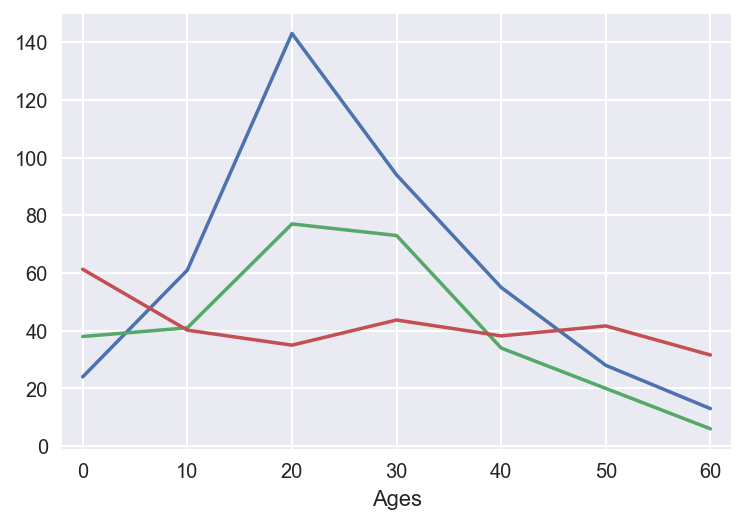

In [11]:
plt.plot(survive_df)
plt.xlim(-2,62)

plt.xlabel("Ages")

plt.show()

range(0, 61, 10) [24.0, 61.0, 143.0, 94.0, 55.0, 28.0, 13.0] [38.0, 41.0, 77.0, 73.0, 34.0, 20.0, 6.0] [61.289999999999999, 40.200000000000003, 35.0, 43.710000000000001, 38.200000000000003, 41.670000000000002, 31.579999999999998]


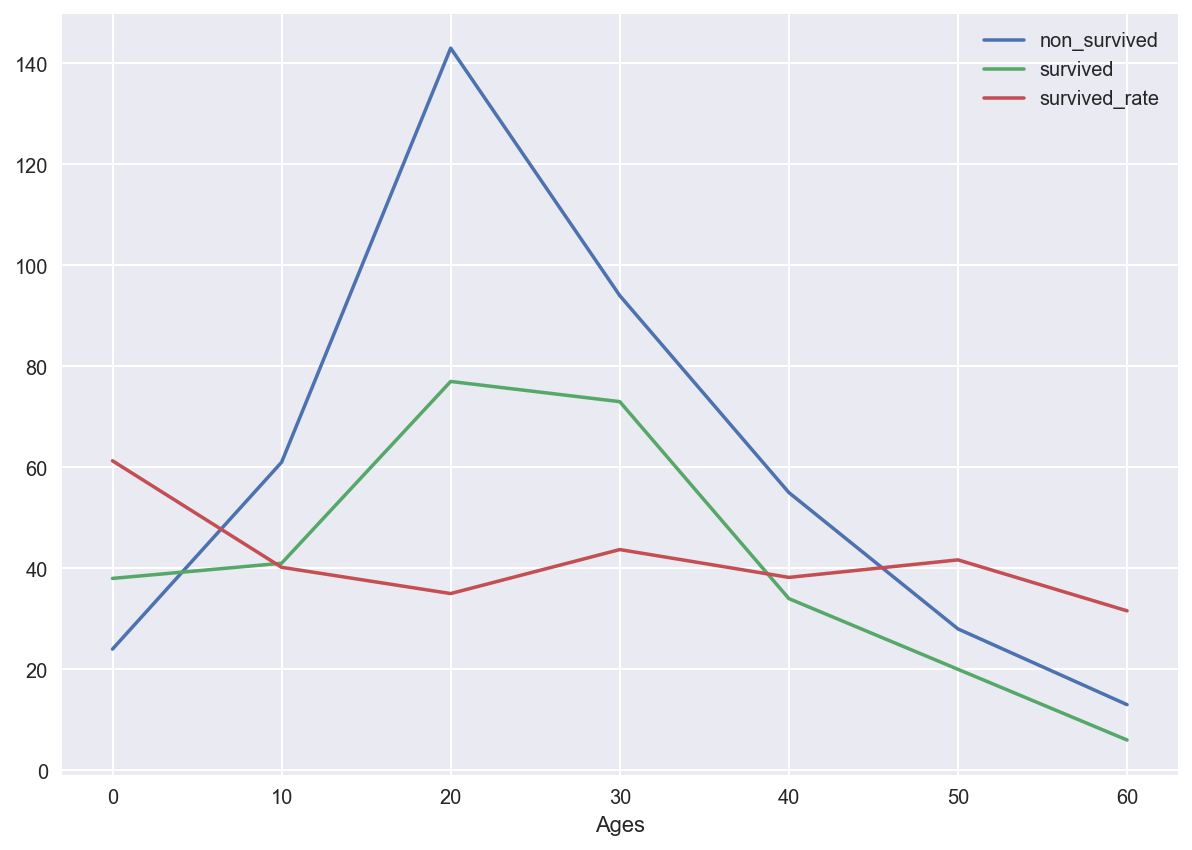

In [12]:
y1 = list(survive_df["non_survived"])
y2 = list(survive_df["survived"])
y3 = list(survive_df["survived_rate"])

plt.figure(figsize=(10,7))

x = range(0 , 61, 10)
plt.xlabel("Ages")
plt.plot(x, y1, label = "non_survived")
plt.plot(x, y2, label = "survived")
plt.plot(x, y3, label = "survived_rate")
plt.legend(loc = 0)

print(x, y1, y2, y3)

In [61]:
titanic["Counts"] = 1
a = titanic.pivot_table("Counts",["Sex"], ["Pclass"], aggfunc=np.sum)
def age_sep(num):
    return (num // 10) *10

titanic["Ages"] = titanic["Age"].apply(age_sep)
titanic.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Counts,Ages
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,1,20.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1,10.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,1,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1,20.0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,1,30.0


In [80]:
tidf1 = titanic#.dropna(subset=["Age","Ages"]).reset_index(drop=True)

p = tidf1.pivot_table("Counts",["Pclass","Sex"],["Ages"], aggfunc=np.sum, fill_value=0)
p #탑승자 통계
s = tidf1.pivot_table("Survived",["Pclass","Sex"],["Ages"], aggfunc=np.sum, fill_value=0)
s #생존자 통계

Ages           0.0   10.0  20.0  30.0  40.0  50.0  60.0  70.0  80.0
Pclass Sex                                                         
1      female     0    13    15    27    13    11     3     0     0
       male       2     2     9    12     9     4     1     0     1
2      female     8     8    22    16     9     5     0     0     0
       male       9     1     0     3     1     0     1     0     0
3      female    11    13    15     7     0     0     1     0     0
       male       8     4    16     8     2     0     0     0     0

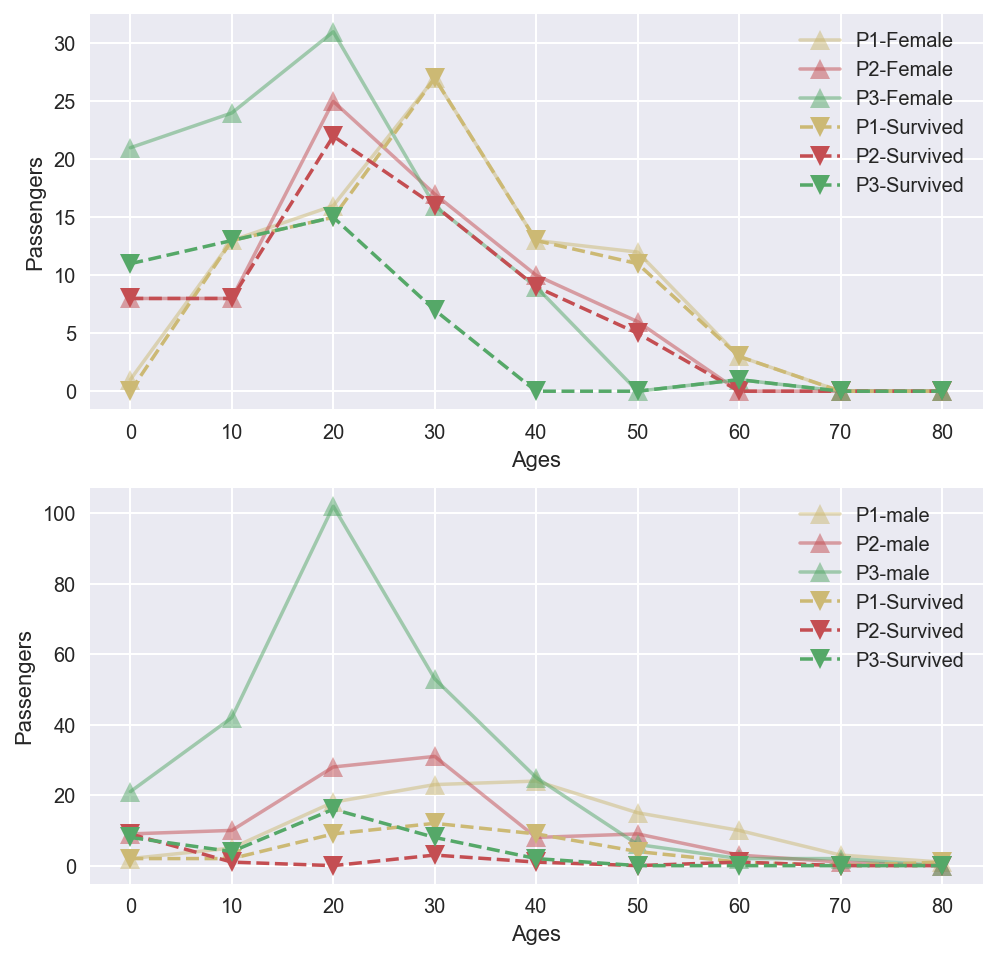

In [106]:
plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
#female 통계
x = list(range(0,81,10))
p1 = p.loc[1].loc["female"]
p2 = p.loc[2].loc["female"] 
p3 = p.loc[3].loc["female"] 
plt.plot(x,p1,'y^-', markersize=10, alpha=0.5, label="P1-Female")
plt.plot(x,p2,'r^-', markersize=10, alpha=0.5, label="P2-Female")
plt.plot(x,p3,'g^-', markersize=10, alpha=0.5, label="P3-Female")

s1 = s.loc[1].loc["female"]
s2 = s.loc[2].loc["female"] 
s3 = s.loc[3].loc["female"] 
plt.plot(x,s1,'yv--', markersize=10, label="P1-Survived")
plt.plot(x,s2,'rv--', markersize=10, label="P2-Survived")
plt.plot(x,s3,'gv--', markersize=10, label="P3-Survived")





plt.xlabel("Ages")
plt.ylabel("Passengers")

plt.legend(loc = 0)

plt.subplot(2,1,2)

#male 통계
p1 = p.loc[1].loc["male"]
p2 = p.loc[2].loc["male"] 
p3 = p.loc[3].loc["male"] 
plt.plot(x,p1,'y^-', markersize=10, alpha=0.5, label="P1-male")
plt.plot(x,p2,'r^-', markersize=10, alpha=0.5, label="P2-male")
plt.plot(x,p3,'g^-', markersize=10, alpha=0.5, label="P3-male")

s1 = s.loc[1].loc["male"]
s2 = s.loc[2].loc["male"] 
s3 = s.loc[3].loc["male"] 
plt.plot(x,s1,'yv--', markersize=10, label="P1-Survived")
plt.plot(x,s2,'rv--', markersize=10, label="P2-Survived")
plt.plot(x,s3,'gv--', markersize=10, label="P3-Survived")

plt.xlabel("Ages")
plt.ylabel("Passengers")

plt.legend(loc = 0)


plt.show()

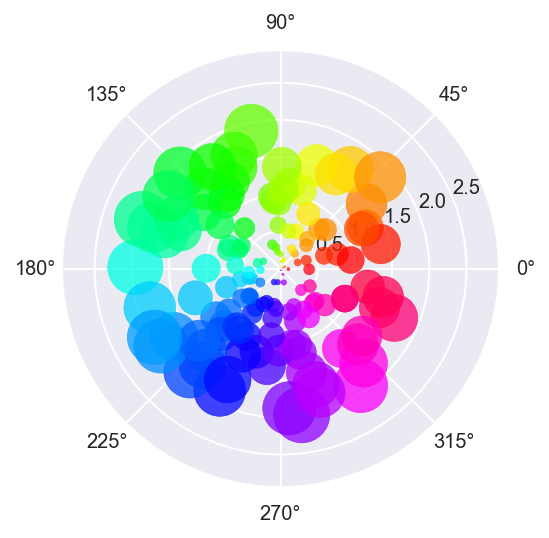

In [110]:
# Compute areas and colors
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta

ax = plt.subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

plt.show()

## matplotlib 애니메이션화하기
- 자바스크립트 html방식
- ffmpeg코덱 파일저장 방식

In [14]:
%%capture
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
plt.rcParams["animation.html"] = "jshtml"
import numpy as np

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
h = ax.axis([0,2*np.pi,-2,2])
l, = ax.plot([],[])

def animate(i):
    l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

In [15]:
ani

### 아래의코드는 실행을 위해 conda install -c conda-forge ffmpeg 먼저 설치해야한다

C:\Users\creal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\creal\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\creal\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\creal\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\creal\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\creal\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\U

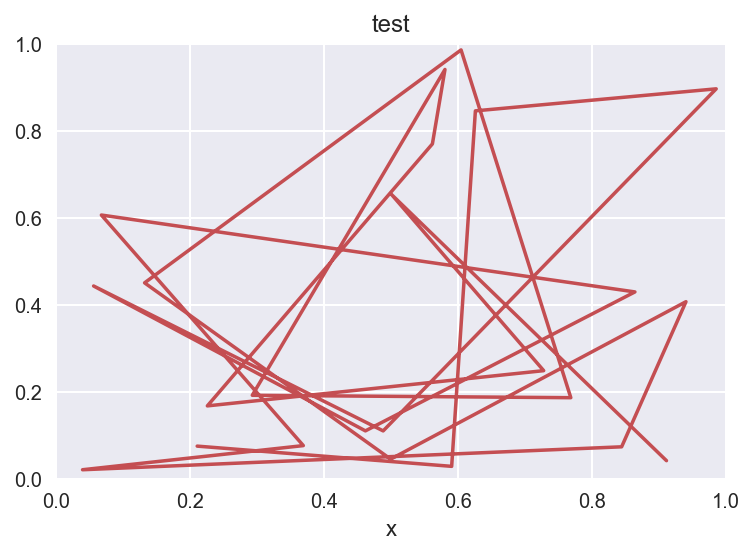

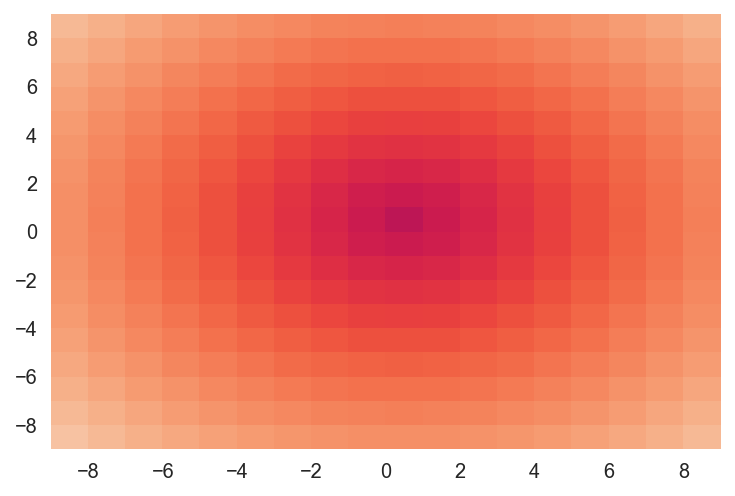

In [17]:
# 실행하면 lines.mp4와 im.mp4파일로 저장된다
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as animation



def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)


fig1 = plt.figure()

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)
line_ani.save('lines.mp4', writer=writer)

fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
                                   blit=True)
im_ani.save('im.mp4', writer=writer)

In [19]:
#현재 쓸수있는 포맷 보여줌
print(matplotlib.animation.writers.list())


['ffmpeg', 'ffmpeg_file', 'html']


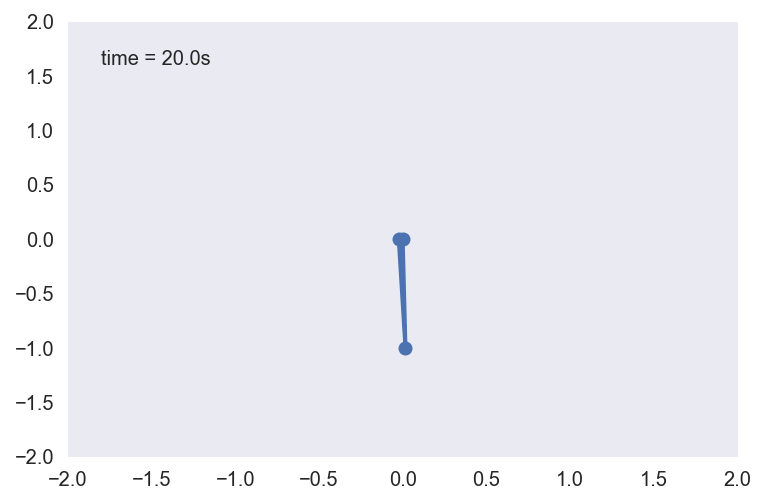

In [48]:
"""
===========================
The double pendulum problem
===========================

This animation illustrates the double pendulum problem.
"""

# Double pendulum formula translated from the C code at
# http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c

from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 20, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

ani.save('double_pendulum.mp4', fps=15)
plt.show()



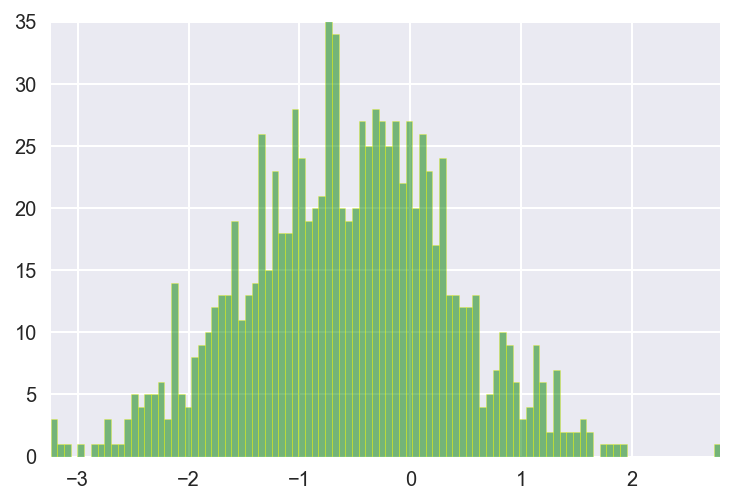

In [52]:
"""
==================
Animated histogram
==================

This example shows how to use a path patch to draw a bunch of
rectangles for an animated histogram.

"""
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation

fig, ax = plt.subplots()

# histogram our data with numpy
data = np.random.randn(1000)
n, bins = np.histogram(data, 100)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
nrects = len(left)

# here comes the tricky part -- we have to set up the vertex and path
# codes arrays using moveto, lineto and closepoly

# for each rect: 1 for the MOVETO, 3 for the LINETO, 1 for the
# CLOSEPOLY; the vert for the closepoly is ignored but we still need
# it to keep the codes aligned with the vertices
nverts = nrects*(1 + 3 + 1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom

barpath = path.Path(verts, codes)
patch = patches.PathPatch(
    barpath, facecolor='green', edgecolor='yellow', alpha=0.5)
ax.add_patch(patch)

ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())


def animate(i):
    # simulate new data coming in
    data = np.random.randn(1000)
    n, bins = np.histogram(data, 100)
    top = bottom + n
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    return [patch, ]

ani = animation.FuncAnimation(fig, animate, 100, repeat=False, blit=True)

ani.save('histogram.mp4', fps=15)

plt.show()



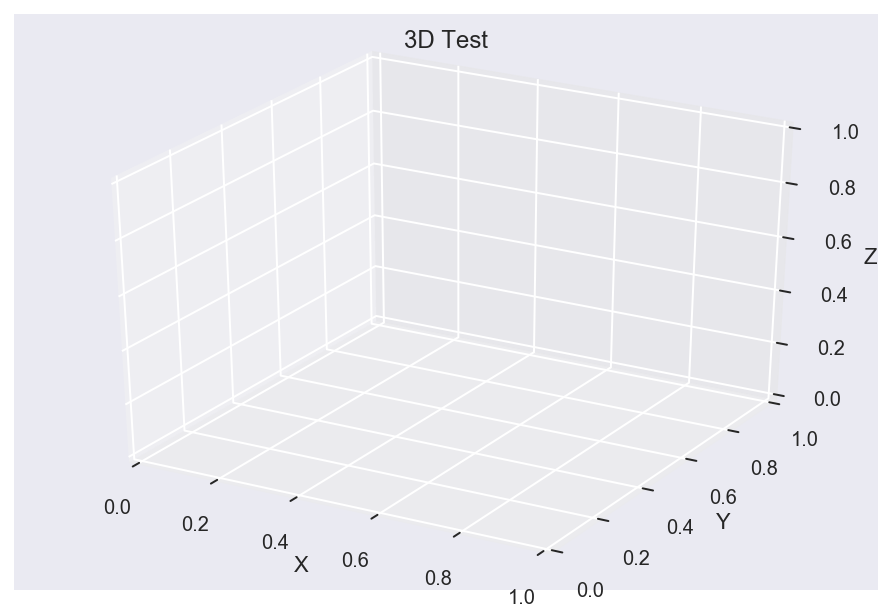

In [56]:
"""
============
3D animation
============

A simple example of an animated plot... In 3D!
"""
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation


def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                                   interval=50, blit=False)

line_ani.save('hh_3D.mp4', fps=10)

plt.show()



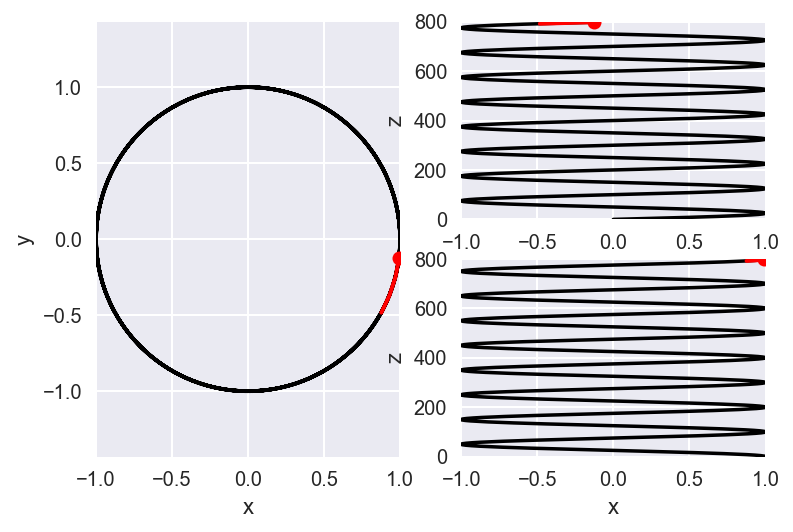

In [59]:
"""
=================
Animated subplots
=================

This example uses subclassing, but there is no reason that the proper function
couldn't be set up and then use FuncAnimation. The code is long, but not
really complex. The length is due solely to the fact that there are a total of
9 lines that need to be changed for the animation as well as 3 subplots that
need initial set up.

"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.animation as animation


class SubplotAnimation(animation.TimedAnimation):
    def __init__(self):
        fig = plt.figure()
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(2, 2, 2)
        ax3 = fig.add_subplot(2, 2, 4)

        self.t = np.linspace(0, 80, 400)
        self.x = np.cos(2 * np.pi * self.t / 10.)
        self.y = np.sin(2 * np.pi * self.t / 10.)
        self.z = 10 * self.t

        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        self.line1 = Line2D([], [], color='black')
        self.line1a = Line2D([], [], color='red', linewidth=2)
        self.line1e = Line2D(
            [], [], color='red', marker='o', markeredgecolor='r')
        ax1.add_line(self.line1)
        ax1.add_line(self.line1a)
        ax1.add_line(self.line1e)
        ax1.set_xlim(-1, 1)
        ax1.set_ylim(-2, 2)
        ax1.set_aspect('equal', 'datalim')

        ax2.set_xlabel('y')
        ax2.set_ylabel('z')
        self.line2 = Line2D([], [], color='black')
        self.line2a = Line2D([], [], color='red', linewidth=2)
        self.line2e = Line2D(
            [], [], color='red', marker='o', markeredgecolor='r')
        ax2.add_line(self.line2)
        ax2.add_line(self.line2a)
        ax2.add_line(self.line2e)
        ax2.set_xlim(-1, 1)
        ax2.set_ylim(0, 800)

        ax3.set_xlabel('x')
        ax3.set_ylabel('z')
        self.line3 = Line2D([], [], color='black')
        self.line3a = Line2D([], [], color='red', linewidth=2)
        self.line3e = Line2D(
            [], [], color='red', marker='o', markeredgecolor='r')
        ax3.add_line(self.line3)
        ax3.add_line(self.line3a)
        ax3.add_line(self.line3e)
        ax3.set_xlim(-1, 1)
        ax3.set_ylim(0, 800)

        animation.TimedAnimation.__init__(self, fig, interval=50, blit=True)

    def _draw_frame(self, framedata):
        i = framedata
        head = i - 1
        head_slice = (self.t > self.t[i] - 1.0) & (self.t < self.t[i])

        self.line1.set_data(self.x[:i], self.y[:i])
        self.line1a.set_data(self.x[head_slice], self.y[head_slice])
        self.line1e.set_data(self.x[head], self.y[head])

        self.line2.set_data(self.y[:i], self.z[:i])
        self.line2a.set_data(self.y[head_slice], self.z[head_slice])
        self.line2e.set_data(self.y[head], self.z[head])

        self.line3.set_data(self.x[:i], self.z[:i])
        self.line3a.set_data(self.x[head_slice], self.z[head_slice])
        self.line3e.set_data(self.x[head], self.z[head])

        self._drawn_artists = [self.line1, self.line1a, self.line1e,
                               self.line2, self.line2a, self.line2e,
                               self.line3, self.line3a, self.line3e]

    def new_frame_seq(self):
        return iter(range(self.t.size))

    def _init_draw(self):
        lines = [self.line1, self.line1a, self.line1e,
                 self.line2, self.line2a, self.line2e,
                 self.line3, self.line3a, self.line3e]
        for l in lines:
            l.set_data([], [])

ani = SubplotAnimation()
ani.save('test_sub.mp4',dpi=480)



plt.show()

